By Searching UniProt for adenosine receptor A3:
    - PDB entry ID: P0DMS8
    - Gene Name: ADORA3
    - Organism: Homo Sapiens
    - Length: 318
    - Sequence: MPNNSTALSLANVTYITMEIFIGLCAIVGNVLVICVVKLNPSLQTTTFYFIVSLALADIAVGVLVMPLAIVVSLGITIHFYSCLFMTCLLLIFTHASIMSLLAIAVDRYLRVKLTVRYKRVTTHRRIWLALGLCWLVSFLVGLTPMFGWNMKLTSEYHRNVTFLSCQFVSVMRMDYMVYFSFLTWIFIPLVVMCAIYLDIFYIIRNKLSLNLSNSKETGAFYGREFKTAKSLFLVLFLFALSWLPLSIINCIIYFNGEVPQLVLYMGILLSHANSMMNPIVYAYKIKKFKETYLLILKACVVCHPSDSLDTSIEKNSE
    - Link: https://www.uniprot.org/uniprotkb/P0DMS8/entry

Goal is to model A3R3 in holo-active conformation.

Using NCBI PSI-BLAST tool with P0DMS8 (PDB ID) sequence, with PDB as database:
    - On second PSI-BLAST Iteration number of sequences was increased to 1000 to ensure no result constraints
    - After the second iteration, ordered by Percentage Identity and noticed new entries are <= 37.50%, so top iterating
    - Apply filters
    - Check that there are still new valid entries. This happens because show list is limited to 500 and we have a total of 661 sequences
    - Reset filters and select all sequences and run a thir iteration of PSI-BLAST
    - Apply filters results in 7 sequences, none of them new. But some valid prior results were disappeared.
    - Go back to 2nd iteration, apply filters and study those results
    - From results of 2nd iteration (12), 2 were chimeric and were ruled out
    - Regarding the other 8, after searching the PDB:
        - All belong to the same family and class (adenosine receptors class A), with varying subclasses (Type ...)
        - Good to leverage structural conservation while incorporating functional diversity
        - Critical regions like transmembrane region (TM) are conserved.
        - Upon closer look:
            - 8x16:
                - A3AR bound to CF101 (IB-MECA), a synthetic agonist
                - represents holo-active state
                - Directly represents A3AR in holo-active conformation
                - Method Cryo-EM
                - Highly suitable
            - 3VG9:
                - A2AR bound to allosteric inverse-agonist antibody (Fab2838)
                - Represents inactive state
                - X-ray
                - Not suitable
            - 5G53:
                - A2AR bound to synthetic agonist G-protein
                - Represents holo-active state
                - X-ray
                - Suitable
            - 2YDO:
                - Thermostabilized A2AR, bound to adenosine, a natural endogenous agonist
                - Represents intermidiate holo-active state
                - Thermostabilization mutations may alter the natural conformation
                - X-ray
                - Moderately Suitable
            - 8CIC:
                - No synthetic ligands
                - A1AR ound to a natural ligand (endogenous agonist adenosine, Gi protein, high biological relevance)
                - Same family and class (adenosine receptor class A), ideal
                - Different sub-class (Type 1), good to leverage structural conservation while incorporating functional diversity, transmembrane region (TM) is conserved
                - Represents holo-active state
                - Highly suitable
            - 5NLX:
                - A2AR bound to synthetic agonist UK-432097 and mini-Gs protein
                - G-protein mimic helps to model the cytoplasmatic active-state conformation
                - Represents holo-active state
                - Synthetic agonist may induce subtle differences in the ligand-binding pocket
                - Highly suitable
            - 5JTB:
                - A2AR bound to synthetic agonist NECA
                - Represents an intermidate active-state without a G-protein
                - Does not fully represent the holo-active state
                - Moderately suitable
            - 8RLN:
                - A2AR bound to caffeine, natural antagonist
                - Represents the receptor in the inactive state
                - Not suitable
            - 8DU3:
                - Engineered structure of A2AR (Star-bRil) bound to theophylline, an antagonist
                - represents an inactive conformation
                - Not suitable
            - 8A2O:
                - Engineered A2AR bound to theophylline, an antagonist
                - Stabilized with StaR mutation and BRIL fusion
                - Represents an inactive conformation
                - Not suitable

Selection = 8X16_R, 2YDO_A, 5G53_A, 8CIC_A, 5NLX_A, 5JTB_A

After selecting 6 possible templates from PSI-BLAST, we turn to HHPred:
    - Input the same sequence (PDB ID: P0DMS8)
    - Cross referance the results we got from PSI-BLAST:
        - 8X16:
            - No direct correspondance, but found 8X17_R
            - In PDB, 8X16 and 8X17 come from the same study and authors (HHPred couples them together)
            - Even though its labeled as Rattus norvegicus in HHPred, upon closer look in PDB we find that the A3AR structural part comes from Homo sapiens
            - Bound to synthetic agonist CF102 (Namodenoson)
            - Coupled with heterotrimic Gi protein
            - Represents holo-active state
            - Highly suitable
        - 2YDO:
            - Not found in HHPred
            - Not Suitable
        - 5G53:
            - Not found in HHPred
            - Not Suitable
        - 8CIC:
            - Not found in HHPred
            - Not Suitable
        - 5NLX:
            - Not found in HHPred
            - Not Suitable
        - 5JTB:
            - Not found in HHPred
            - Not Suitable

In our first round of analysis, we have one suitable template (8X16_R) from HHpred.
To facilitate the search for at least three more templates, I downloaded the .hhr file from the results of HHPred. With the aid of some coding, I gathered the data from all the entries of the HHPred results, filtered out the ones taht cointained the keyword 'chimer' in the name, computed the query coverage percentage ([length of aligned query region/ length of query]*100), ordered by identity, similarity and query coverage percentages, and finally applied a filter to rule out those whose identify, similarity and query coverage were under 36%, 55% and 86% respectively.

In [1]:
from archive import Archive
from utils import *
from typing import List, Union
from functools import partial
import numpy as np

args = ['No', 'Hit', 'Name', 'Probability', 'E-value', 'P-value', 'Score', 'SS', 'Cols', 'Query HMM', 'Template', 'HMM', 'Query Coverage', 'Similarity', 'Identities', 'Organism']
archive = Archive(args=args, query_length=318, templates = [])

hhpred_metrics_path = 'hhpred_metrics.txt'
archive = first_pass(hhpred_metrics_path, archive)

hhpred_alignments_path = 'hhpred_alignments.txt'
archive, templates_no_attr, accounted = second_pass(hhpred_alignments_path, archive)

verified = verify_files_correspondance(templates_no_attr, accounted)
original_archive = archive

save_archive_path = 'data/archive.txt'
all_hits = archive.save_to_csv(save_archive_path)


All templates accounted for.


In [2]:
# ['No', 'Hit', 'Name', 'Probability', 'E-value', 'P-value', 'Score', 'SS', 'Cols', 'Query HMM', 'Template', 'HMM', 'Query Coverage', 'Similarity', 'Identities', 'Organism']
ordering_params = ['Similarity','Identities','Query Coverage']
saving_params = ['No','Hit','Organism'] + ordering_params + ['E-value','Name']

# identities standard >=40, similarity standard >=60, query coverage standard >= 90
filters = dict({'Identities': [36,float('inf')], 
                'Similarity': [0.55,float('inf')], 
                'Query Coverage': [0.86,float('inf')],
                #'Score': [175,float('inf')],
                #'SS': [24,float('inf')],
                #'Organism': (True, ['homo sapiens','unknown']),
                #'Name': (False,['chimera','fusion'])
                })

hhpred_results_metrics = './data/hhpred_results_metrics.csv'
descending = True

def func(parameters: List[Union[int, float]], scalings: List[float]) -> float:
    return np.array(parameters) @ np.array(scalings)

f = partial(func, scalings=[1, 100, 1])

archive.order_by_parameters(descending, None, *ordering_params)
saved_hits = archive.save_to_csv(hhpred_results_metrics, filters, saving_params)
print(f'\nMetrics saved to {hhpred_results_metrics}')

hhpred_results_pdb_links_path = './data/hhpred_results_links.txt'
hhpred_results_pdb_links = get_or_save_pdb_links_from_hit_list(saved_hits, hhpred_results_pdb_links_path)
print(f'Links saved to {hhpred_results_pdb_links_path}.')

for h,l in zip(saved_hits,hhpred_results_pdb_links):
    print(f'{h} -> {l}')

154 Ruled out by Identities:29.0 filter.
134 Ruled out by Identities:28.0 filter.
85 Ruled out by Identities:26.0 filter.
241 Ruled out by Identities:26.0 filter.
235 Ruled out by Identities:25.0 filter.
91 Ruled out by Identities:24.0 filter.
77 Ruled out by Identities:25.0 filter.
31 Ruled out by Identities:25.0 filter.
6 Ruled out by Identities:23.0 filter.
186 Ruled out by Identities:26.0 filter.
55 Ruled out by Identities:23.0 filter.
32 Ruled out by Identities:23.0 filter.
161 Ruled out by Identities:24.0 filter.
176 Ruled out by Identities:23.0 filter.
245 Ruled out by Identities:22.0 filter.
47 Ruled out by Identities:26.0 filter.
58 Ruled out by Identities:25.0 filter.
229 Ruled out by Identities:23.0 filter.
224 Ruled out by Identities:24.0 filter.
15 Ruled out by Identities:23.0 filter.
93 Ruled out by Identities:24.0 filter.
159 Ruled out by Identities:23.0 filter.
38 Ruled out by Identities:26.0 filter.
36 Ruled out by Identities:25.0 filter.
149 Ruled out by Identities:22

The later procedure yielded in 12 possible entries, found in table hhpred_results_metric.csv.
The first entry was already taken into consideration, thus I performed analysis on the remaining using PDB just like before.

Table hhpred_results_table_analysis.csv sums up all the gathered data. At first glance we see that 8GNG, 5UEN, 5N2S, 7T32 are in inactive state, so we discard them, whereas the remaining are taken into consideration. But open closer inspection in the PDB website, we notice that: the 7LD3 is a chimera of the muscarinic acetylcholine receptor M4 and A1AR; 4UG2 used a thermostabilized human A2a receptor, which potentiates mutations; so we discard these too.

To further aid this analysis, I looked back into the extracted metrics from HHPred, e.g. similarity, identity, query coverage, columns covered, by order of similarity, identity, suitability, and inverse-resolution, in reverse, to generate table hhpred_results_table_analysis_filtered.csv

In [11]:
path = 'report_assets/hhpred_results_table_analysis.csv'

with open(path, 'r') as f:
    lines = f.readlines()

labels = lines[0].split(',')
data = [line.split(',') for line in lines]
data = [d for d in data if d[1] == 'Active']

save_path = 'report_assets/hhpred_results_table_analysis_filtered.csv'
links_save_path = 'data/hhpred_results_filtered_links.txt'

# similarity, identity, query coverage, columns covered,

discard = ['8GNG', '5UEN', '5N2S', '7T32', '7LD3', '4UG2']

with open(save_path, 'w') as f:
    extract_metrics = ['Similarity','Identities','Query Coverage', 'Query HMM']
    new_labels = [labels[i] for i in [0,5,6,7]] + extract_metrics
    f.write(','.join(new_labels)+'\n')
    new_data = []
    names = []
    with open(links_save_path, 'w') as g:
        for d in data:
            g.write(generate_pdb_link(d[0])+'\n')
            if d[0] not in discard:
                new_data.append([d[i] for i in [0,5,6,7]])
                names.append(d[0].lower())
    for t in archive.templates:
        try:
            idx = names.index(t.get_attribute('Hit').split('_')[0])
            new_data[idx] += [t.get_attribute(a) for a in extract_metrics]
        except:
            continue       
    new_data = sorted(new_data, key = lambda x: (float(x[4]), float(x[5]), len(x[2]), 1/float(x[1].split(' ')[0]) ), reverse=True  )
    for d in new_data:
        f.write(','.join([e if isinstance(e, str) else str(e) for e in d]) + '\n')    

We could directly pick the first three or more entries, but another important aspect to consider is the overall coverage from the combination of these templates. To investigate this, I determined the frequency of the aligned columns of the query with respect to all the templates. 

To analyze this, I computed all combinations of three to five potential templates (taking into account we already have 8X17 taken into consideration), ploted the alignment columns frequency and computed an
average log-weighted frequency score (to penalize and delineate the constraints of coverage). 

Ideal combo due to complex binding: ['8X17', '6GDG', '8HDO', '7XY6']


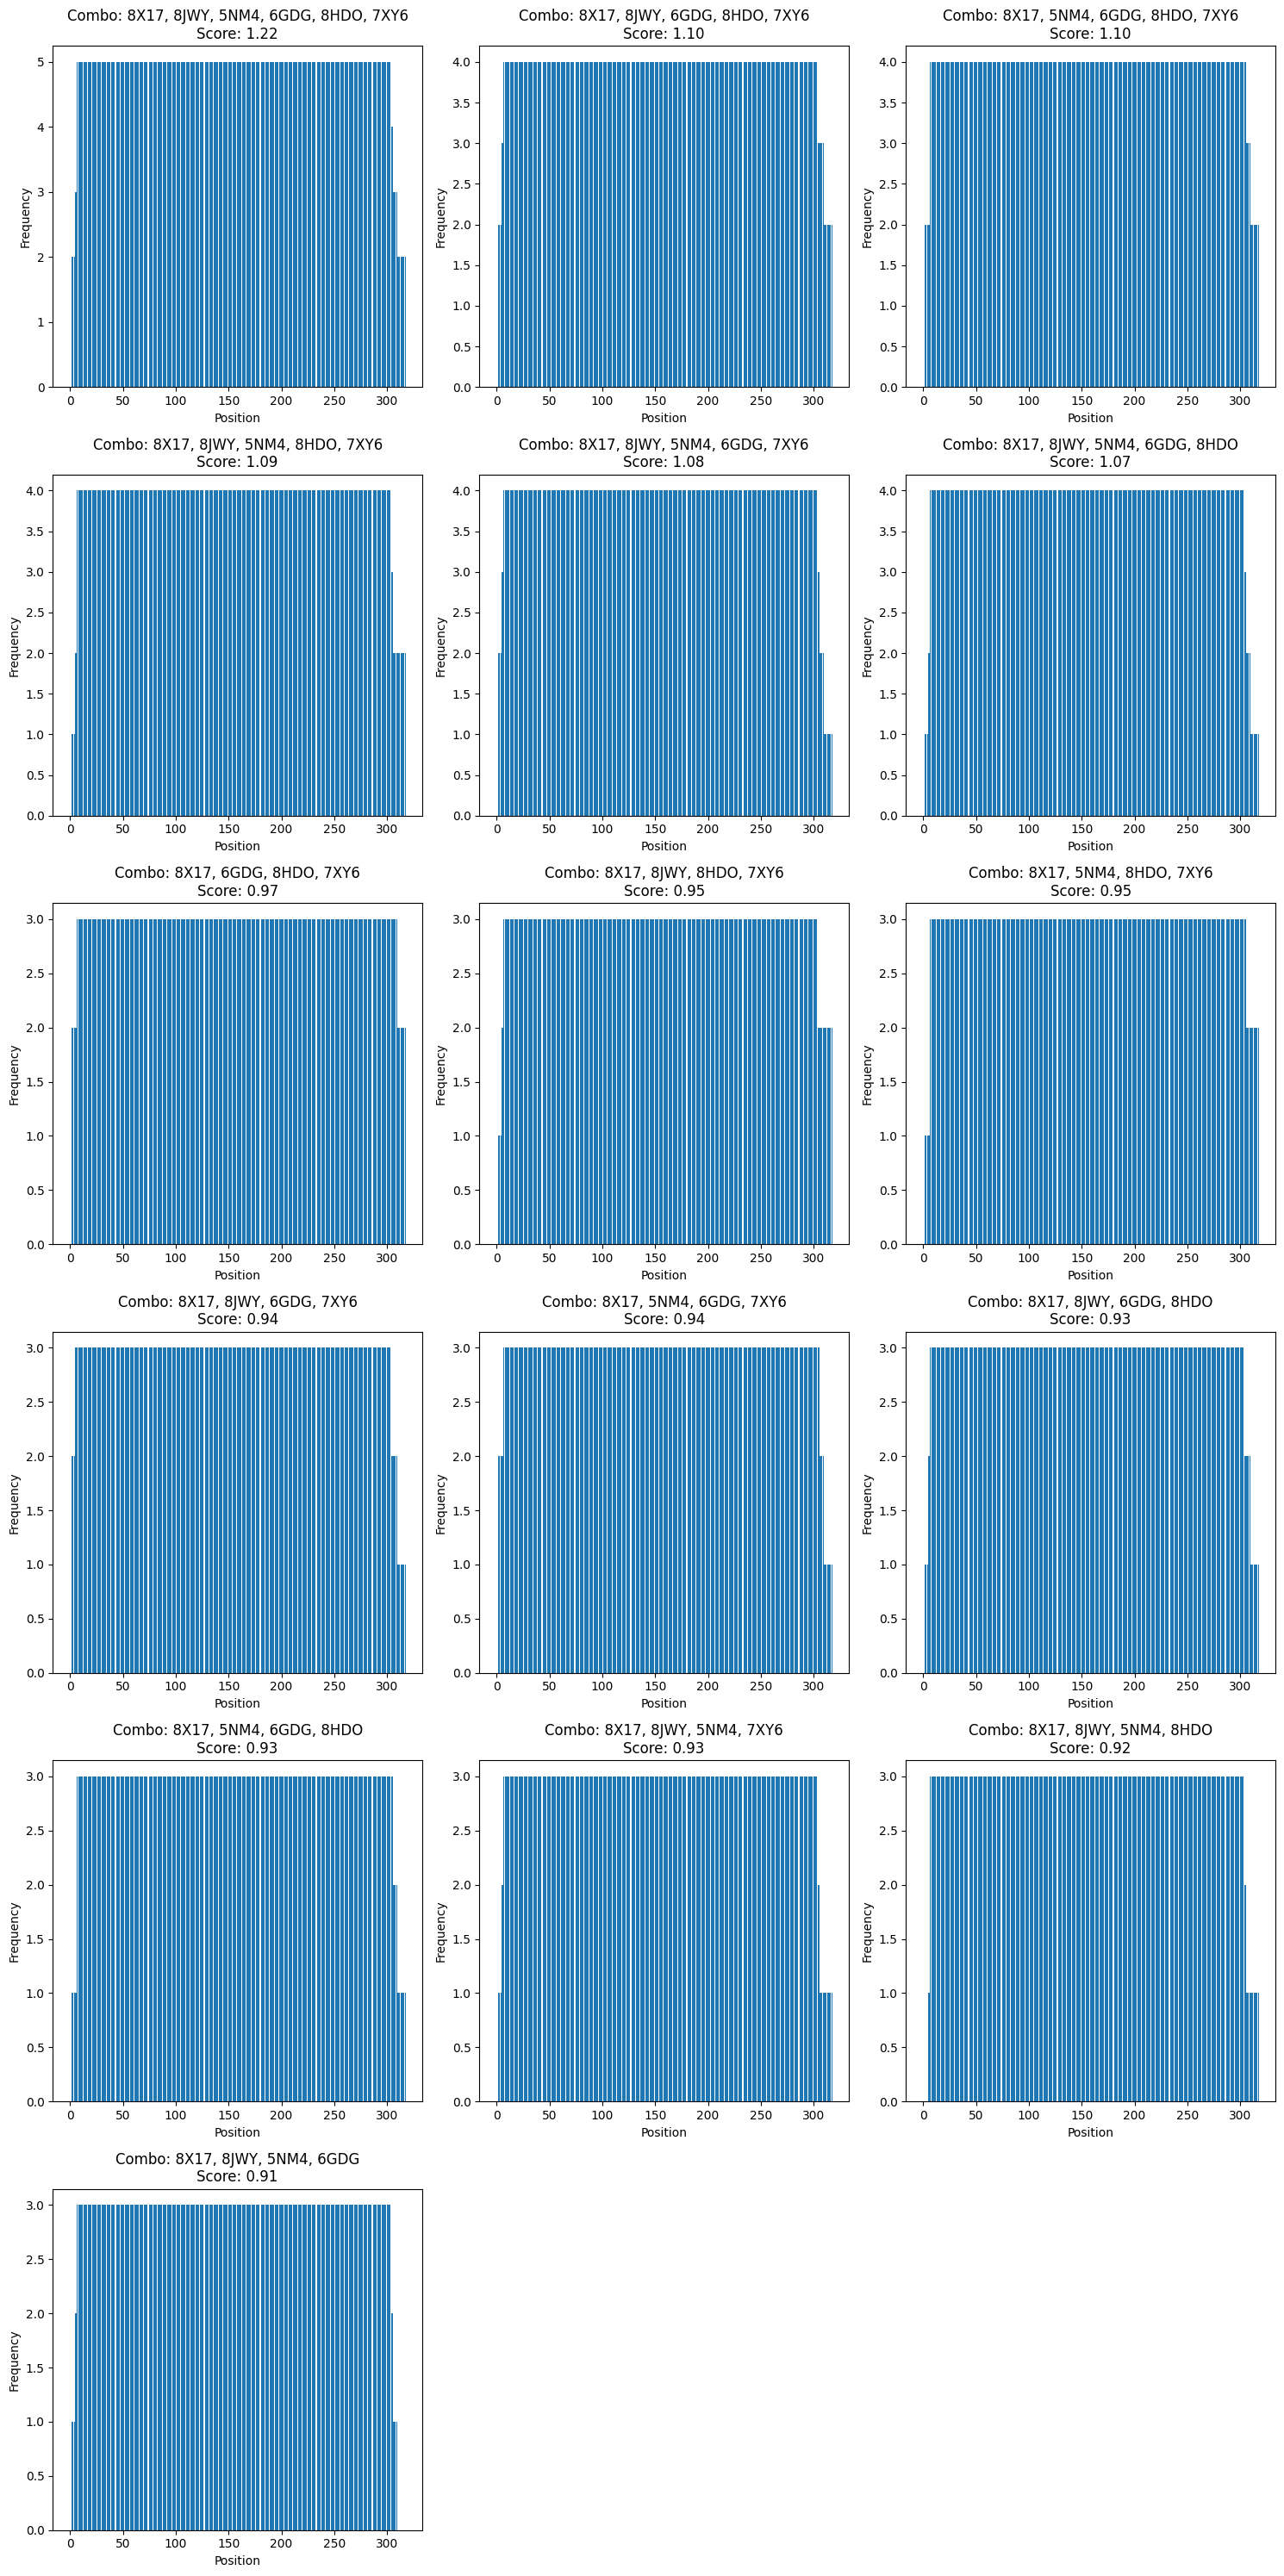

In [22]:
hits = [p[0].lower() for p in new_data[1:]]
combos = generate_combinations(hits, 3, 5)
granted = [new_data[0][0]]
combos = [granted+x for x in combos]
print(f"Ideal combo due to complex binding: {granted+[x[0] for x in new_data if x[3] != 'None'][1:]}")

frequencies = [archive.get_frequency_coverage_for_hits(c) for c in combos]
normalized_frequencies = [[f/max(freqs) for f in freqs] for freqs in frequencies]
avg_normalized_frequencies = [sum(nf)/len(nf) for nf in normalized_frequencies]
avg_log_weighted_freqs_score = [avg_log_weighted_freq_score(archive, x) for x in combos]
scores = [i*j for i,j in zip(avg_normalized_frequencies,avg_log_weighted_freqs_score)]

sorting_idxs = sorted(range(len(scores)), key = lambda x: scores[x], reverse=True)
combos = [combos[i] for i in sorting_idxs]
scores = [scores[i] for i in sorting_idxs]
frequencies = [frequencies[i] for i in sorting_idxs]


num_combos = len(combos)
num_cols = 3 
num_rows = (num_combos + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration



for ax, combo, freq, score in zip(axes, combos, frequencies, scores):
    ax.bar(range(len(freq)), freq)
    ax.set_title(f"Combo: {', '.join([c.upper() for c in combo])}\nScore: {score:.2f}")
    ax.set_xlabel('Position')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for ax in axes[len(combos):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Cross referencing the results with the data available on hhpred_results_table_analysis_filtered.csv table, we can now do an evidence based decision. On the aforementioned table, we notice that combination ['8X17', '6GDG', '8HDO', '7XY6'] finds itself in position 7, which makes it an attractable candidate because all these proteins are in holo-active state bound do a G-complex, and overall coverage is good for the exception of the far end of the terminals, which is to be expected. The evidence shows that this option is a good compromise between all the crucial parameters to be taken into account.

Finally, in table final_hhpred_selection.csv we can see all the relevant paramaters for our final choice.

In [24]:
selection = combos[7-1] 
selection = [s.upper() for s in selection]

# pub_id -> (['resolution','similarity','identity','querycov','ligand_type','ligand_name','effector','pro_name'] -> values)
selection_info_dict = {}

# 0:pdb id, 1:resolution, 3:similarity, 4:identity, 5: query coverage
hhpred_results_table_analysis_filtered = 'report_assets/hhpred_results_table_analysis_filtered.csv'
# 0:pdb id, 2:ligand type, 3:ligand name, 7:effector, 9:Protein name
hhpred_results_table_analysis = 'report_assets/hhpred_results_table_analysis.csv'

with open(hhpred_results_table_analysis_filtered, 'r') as f:
    lines = f.readlines()
    
for line in lines[1:]:
    line = line.split(',')
    pdb_id = line[0]
    if pdb_id in selection:
        res = round(float(line[1].split(' ')[0]),2)
        sim = round(float(line[4])*100,2)
        ident = round(float(line[5]),2)
        qc = round(float(line[6]),2)
        info_dict = {'Resolution':res, 'Similarity': sim, 'Identity': ident, 'Query cover':qc}
        selection_info_dict[pdb_id] = info_dict

with open(hhpred_results_table_analysis, 'r') as f:
    lines = f.readlines()

for line in lines[1:]:
    line = line.split(',')
    pdb_id = line[0]
    if pdb_id in selection_info_dict.keys():
        selection_info_dict[pdb_id]['Ligand type'] = line[2].strip()
        selection_info_dict[pdb_id]['Ligand name'] = line[3].strip()
        selection_info_dict[pdb_id]['Effector'] = line[7].strip()
        selection_info_dict[pdb_id]['Protein name'] = line[9].strip()


labels_order = ['Protein name','PBD ID','Identity','Similarity','Resolution','Query cover','Ligand name','Ligand type','Effector']
final_hhpred_table = 'report_assets/final_hhpred_table.csv'

with open(final_hhpred_table, 'w') as f:
    f.write(','.join(labels_order)+'\n')
    for k,v in selection_info_dict.items():
        s = f"{v['Protein name'].strip()},{k},"
        for l in labels_order[2:]:
            s += f'{v[l]},'
        s = s.removesuffix(',') + '\n'
        f.write(s)

Having selected these templates, we can now proceed forward them to MODELLER.

After modelling our target protein with the selection, we can observe in the images that the transmembranes helices (TM) are well defined without any accentuated distortions or accute bendings. On the other end, TM7 has an accentuated skew making so that the c-terminal ends up in the lipid-bilayer, which is an expected features of GPCRs such like A3AR. This feature was observed in different combinations of templates. We can also observe that the extra-cellular loop (ECL) 2 presents some distortions, which can be due to the nature ligand binding present in all templates. No loops are or holes are observed, and the terminals do not overly extend.

To make a-priori analysis we used PsiPred tool, selecting PSIPRED 4.0 and MEMSAT-SVM as our algorithms.
Looking at the results from PSIPRED and cross-referancing with the atom positions in the 3d-model from MODELLER we can verify that the values don't skew a lot from the predicted positions (1.64 on average). Some values inside the helices predicted by PSIPRED are determined as a coil, so we have to account for the small regions still accouting for an helix. Taking this into consideration, a total os 7 helices are predicted with indexes of the alignment somewhat skewed. We can further validate these results by looking at UniProt's subcellular feature locations.

On the other hand, because MEMSAT is transmemnbrane specific-tool, it completly fails to predict the secondary structure of the model, resulting in only 4 total helices. Thus, MEMSAT is not a good a-priori validation tool for our case.

Using DeepTMHMM, which is more accurate in nature to predict secondary structures, we verify that the results skew more than PSIPRED from the modeled protein (5.07 on average).

We can see the sum of this information on table motif_ranges_xlxs by mapping the absolute differences (diff) into colors green, yellow and green, when diff is less or equal to 2, between 3 and 4,  and greater than 4, respectively.


To make an a-posteriori analysis we make use of ProCheck Saves v6.1 by uploading the PDB file we got from our model during MODELLER.

Analysis:

The Ramachandran plot provides a summary of the backbone torsion angles (ϕ and ψ) of residues in the protein structure and is a key indicator of structural quality. In this model, 95.9% of residues lie in the most favored regions (A, B, L), which means the majority of residues adopt energetically favorable backbone conformations. This percentage exceeds the 90% threshold typically used to define a high-quality model. Additionally, 3.4% of residues are in the additional allowed regions (a, b, l, p), and 0.7% are in generously allowed regions (~a, ~b, ~l, ~p). These regions correspond to less common but still permissible backbone conformations, often associated with flexibility or local structural constraints. Importantly, no residues are found in disallowed regions, which indicates that the structure is free from steric clashes or highly unfavorable conformations. The presence of 11 glycine residues, which are marked as triangles, is consistent with their well-known flexibility and ability to adopt unusual conformations. Similarly, the 9 proline residues, marked as squares, cluster in specific regions due to the restricted torsion angles imposed by the cyclic side chain. With a total of 318 residues analyzed, the structure achieves an excellent overall quality, with deviations likely reflecting functional requirements or localized flexibility.

Residues 213 (SER) and 256 (ASN) are highlighted as red squares on the plot, indicating that their torsion angles place them in additional allowed or generously allowed regions. For residue 213 (SER), the conformation is influenced by the structural context, as serine is a small and flexible residue often found in loops or turns where non-ideal torsion angles are more common. For residue 256 (ASN), the amide side chain may be forming hydrogen bonds or interacting with neighboring residues, pulling the backbone into a less favored conformation. These deviations from ideal geometry reflect localized flexibility or specific functional roles, such as stabilizing loops or binding pockets. Moreover, both residues are in allowed regions and are not disallowed, so their conformations are permissible and likely justified by the structural environment.



These plots analyze the backbone torsion angles (ϕ and ψ) for each amino acid type and highlight residues with conformations that deviate from expected regions. The plots include shading for favored conformations (green/yellow) and highlight outliers (red squares), which represent residues in unfavorable conformations. In the shown images, specific residues are marked with red squares. These include Ser 213, which appears in an unfavorable conformation located in the additional or generously allowed region. Serine’s small and flexible nature means it is often found in loops or turns, which may explain this deviation. Asn 256 is also located in an unfavorable region, likely due to its amide side chain causing steric or conformational strain. Thr 77 is highlighted as an outlier, and threonine's side chain hydroxyl group may cause steric hindrance or hydrogen bonding, leading to deviations. Gln 44 is another outlier in an unfavorable region, where glutamine’s bulky side chain may be influencing its backbone torsion angles. Ala 220, despite alanine being highly flexible, appears as an outlier, possibly due to constraints from its structural environment. Finally, Gly 217 is marked as an outlier, which is unusual because glycine, due to the absence of a side chain, often adopts unusual backbone angles. However, this residue may have extreme flexibility or local structural strain causing this deviation. These outliers (red squares) indicate that the residues adopt unusual torsion angles, but they may still be biologically or structurally relevant if located in loops, active sites, or other regions requiring flexibility.



Chi1-Chi2 plots analyze the side chain torsion angles (χ1 and χ2) of amino acids in the protein structure. These torsion angles describe the rotational conformations of the side chains around their bonds. The plots show favored conformations as green and yellow regions based on statistical data from high-resolution protein structures, while residues in unfavorable conformations are marked with red squares.

In the shown plots, specific residues fall into unfavorable regions. For example, in the Asn (15) plot, several residues have side chain torsion angles that deviate significantly from favored regions, as indicated by the red squares. This is likely due to steric clashes, hydrogen bonding, or constraints imposed by the local structural environment. Similarly, in the Ile (29) plot, a red square highlights an outlier with torsion angles in a highly strained position, which might result from packing constraints or interactions with nearby residues. In the Leu (48) plot, multiple outliers can be seen, likely due to leucine’s branched side chain experiencing steric interference in crowded environments. The same applies to Cys (2) and Glu (8), where red squares indicate strained side chain conformations, possibly due to disulfide bond formation (for cysteine) or charge interactions (for glutamate).

# Dev Code

In [8]:
# ['No', 'Hit', 'Name', 'Probability', 'E-value', 'P-value', 'Score', 'SS', 'Cols', 'Query HMM', 'Template', 'HMM', 'Query Coverage', 'Similarity', 'Identities', 'Organism']
ordering_params = ['Similarity','Identities','Query Coverage']
saving_params = ['No','Hit','Organism'] + ordering_params + ['E-value','Name']

# identities standard >=40, similarity standard >=60, query coverage standard >= 90
filters = dict({'Identities': [36,float('inf')], 
                'Similarity': [0.55,float('inf')], 
                'Query Coverage': [0.86,float('inf')],
                #'Score': [175,float('inf')],
                #'SS': [24,float('inf')],
                #'Organism': (True, ['homo sapiens','unknown']),
                #'Name': (False,['chimera','fusion'])
                })

hhpred_results_metrics = './data/hhpred_results_metrics.csv'
descending = True

def func(parameters: List[Union[int, float]], scalings: List[float]) -> float:
    return np.array(parameters) @ np.array(scalings)

f = partial(func, scalings=[1, 100, 1])

archive.order_by_parameters(descending, None, *ordering_params)
saved_hits = archive.save_to_csv(hhpred_results_metrics, filters, saving_params)
print(f'\nMetrics saved to {hhpred_results_metrics}')

hhpred_results_pdb_links_path = './data/hhpred_results_links.txt'
hhpred_results_pdb_links = get_or_save_pdb_links_from_hit_list(saved_hits, hhpred_results_pdb_links_path)
print(f'Links saved to {hhpred_results_pdb_links_path}.')

for h,l in zip(saved_hits,hhpred_results_pdb_links):
    print(f'{h} -> {l}')

154 Ruled out by Identities:29.0 filter.
134 Ruled out by Identities:28.0 filter.
85 Ruled out by Identities:26.0 filter.
241 Ruled out by Identities:26.0 filter.
235 Ruled out by Identities:25.0 filter.
91 Ruled out by Identities:24.0 filter.
77 Ruled out by Identities:25.0 filter.
31 Ruled out by Identities:25.0 filter.
6 Ruled out by Identities:23.0 filter.
186 Ruled out by Identities:26.0 filter.
55 Ruled out by Identities:23.0 filter.
32 Ruled out by Identities:23.0 filter.
161 Ruled out by Identities:24.0 filter.
176 Ruled out by Identities:23.0 filter.
245 Ruled out by Identities:22.0 filter.
47 Ruled out by Identities:26.0 filter.
58 Ruled out by Identities:25.0 filter.
229 Ruled out by Identities:23.0 filter.
224 Ruled out by Identities:24.0 filter.
15 Ruled out by Identities:23.0 filter.
93 Ruled out by Identities:24.0 filter.
159 Ruled out by Identities:23.0 filter.
38 Ruled out by Identities:26.0 filter.
36 Ruled out by Identities:25.0 filter.
149 Ruled out by Identities:22

Apo Active State in GPCRs Is Rare:

    Most GPCRs, including A3AR, are not active in the apo state under physiological conditions. They typically require ligand binding (agonist) to stabilize the active conformation.
    Apo GPCR structures, when available, are often in an inactive state or in an intermediate state.


Ligand-Bound (Holo Active) Templates Are Preferred for GPCRs:

    Active states of GPCRs are generally obtained from structures bound to agonists or G-proteins.
    These holo active templates better represent the structural features required for signaling, such as the outward movement of transmembrane helix 6 (TM6) and the active conformation of the ligand-binding pocket.


Recommended Approach for A3AR:

    Use Holo Active Templates:
        Select GPCR templates bound to agonists or G-proteins (e.g., activated forms of adenosine receptors like A2AR or other Class A GPCRs).
        These templates will likely capture the active conformation of TM domains and the ligand-binding pocket.

    Sequence Similarity Is Key:
        Prioritize templates with high sequence identity to A3AR, especially in critical regions such as the orthosteric binding site and G-protein interaction regions.
        A2AR is a good candidate since it is structurally similar and often crystallized in active conformations.

    Consider Multiple States for Flexibility:
        If available, compare apo inactive, apo active (if it exists), and holo active templates to assess conformational flexibility.

    Add Ligands Post-Modeling If Needed:
        If you're studying agonists or antagonists, you can model the protein-ligand complex after obtaining an active-state model.

PDB ID: 8X17
Name: A3AR
Identity: 100%
Similarity: 
Notes:
    - Found as 8X16 under PDB PSI-BLAST for homo sapiens, but found as 8X17_R in HHPred.
    - In paper primary citation of related structures we can find both 8X16 and 8X17 (HHPred couples them together)
    - Labeled for Rattus norvegicus under HHPred
    - The A3AR molecule belongs to homo sapiens organism (entity ID. 2 under PDB)
    - Added ligands for stable conformation come from Bos taurus, Rattus norvegicus and Mus musculus



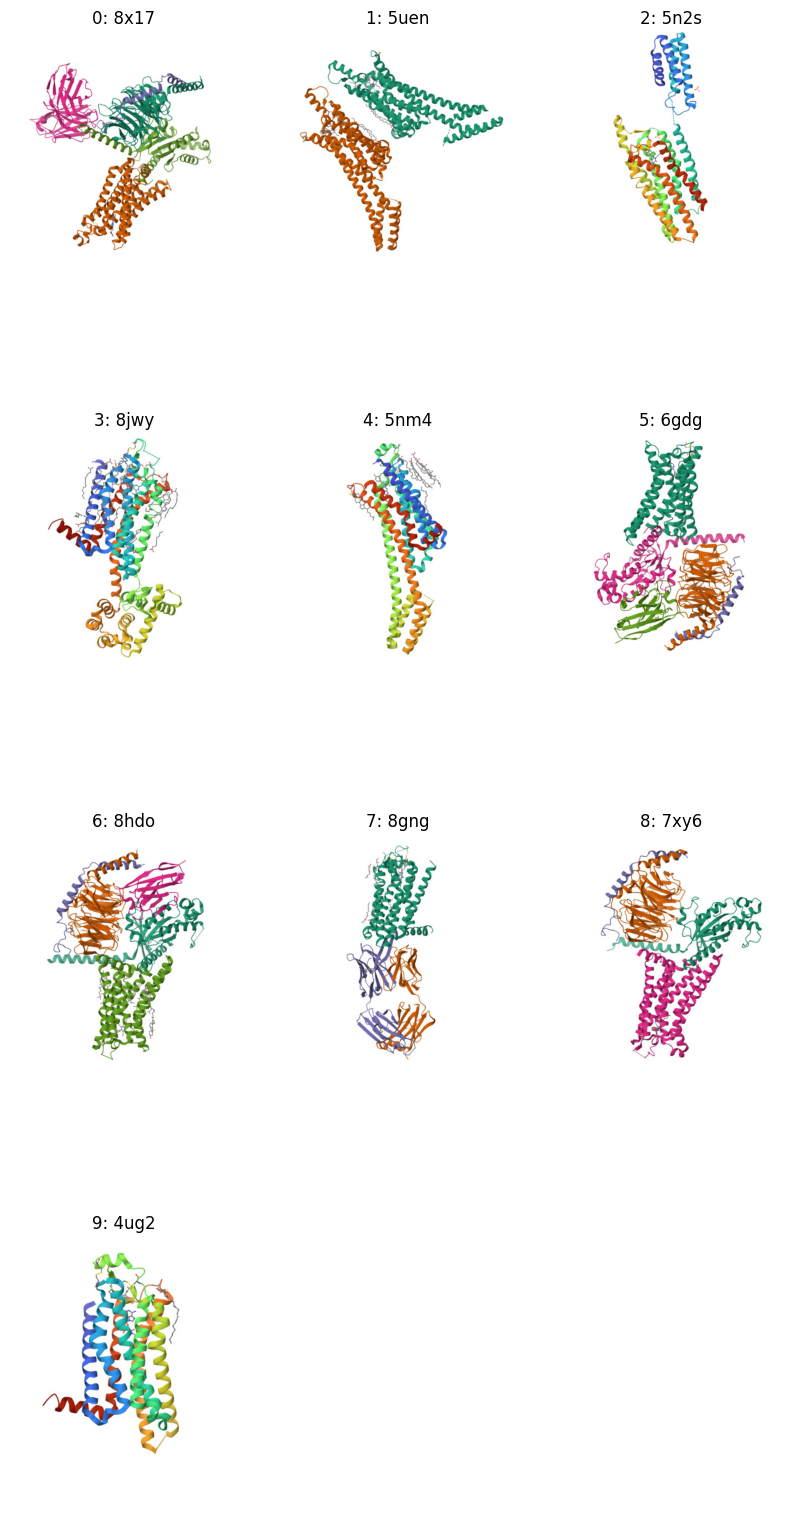

In [ ]:
image_dir_path = 'images'

hits = get_hits_from_csv(hhpred_results_metrics)
hits = [hit.split('_')[0] for hit in hits]
see_all_hits_3d(hits, image_dir_path)

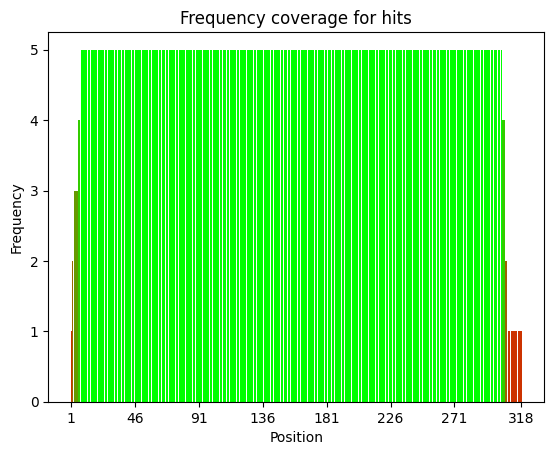

4.80188679245283


In [3]:
chosen_hits_idx = [0,1,2,3,4]
chosen_hits = [hits[i] for i in chosen_hits_idx]

frequencies = archive.get_frequency_coverage_for_hits(chosen_hits)
avg_freqs = archive.get_average_frequency(frequencies)
archive.plot_frequency_coverage(frequencies)
print(avg_freqs)

[6.8742138364779874, 6.8742138364779874, 6.867924528301887, 6.8584905660377355, 6.8584905660377355, 6.852201257861635, 6.852201257861635, 6.845911949685535, 6.845911949685535, 6.845911949685535, 6.845911949685535, 6.8427672955974845, 6.839622641509434, 6.839622641509434, 6.836477987421383, 6.836477987421383, 6.836477987421383, 6.836477987421383, 6.836477987421383, 6.836477987421383, 6.836477987421383, 6.836477987421383, 6.830188679245283, 6.830188679245283, 6.830188679245283, 6.830188679245283, 6.823899371069182, 6.820754716981132, 6.820754716981132, 6.820754716981132, 6.820754716981132, 6.820754716981132, 6.820754716981132, 6.817610062893082, 6.817610062893082, 6.817610062893082, 6.817610062893082, 6.817610062893082, 6.817610062893082, 6.817610062893082, 6.817610062893082, 6.814465408805032, 6.814465408805032, 6.814465408805032, 6.814465408805032, 6.811320754716981, 6.811320754716981, 6.811320754716981, 6.811320754716981, 6.8081761006289305, 6.8081761006289305, 6.8081761006289305, 6.8

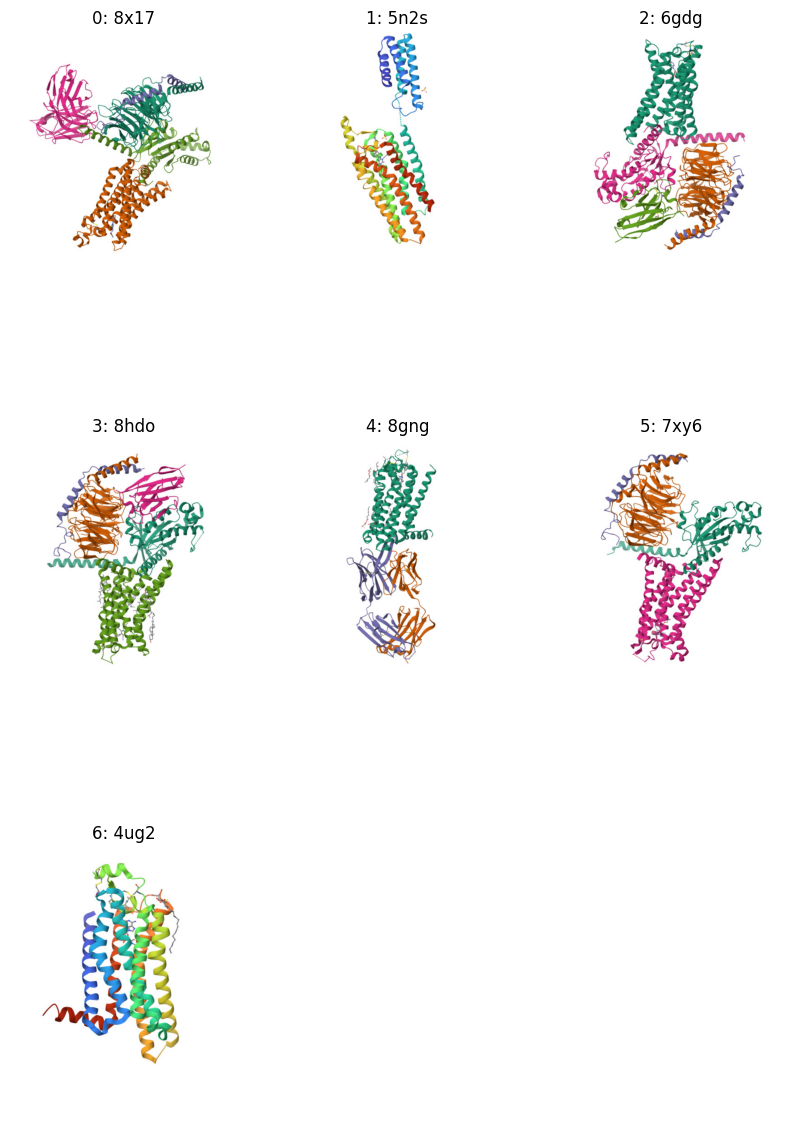

In [4]:
combos = generate_combinations(hits, 3, 7)

average_by_hits = False

combos_sorted1 = sorted(combos, key=lambda x: freq_score_avg_averaged_by_hits(archive, x, average_by_hits), reverse=True)
combos_sorted_score = [freq_score_avg_averaged_by_hits(archive, x, average_by_hits) for x in combos_sorted1]
print(combos_sorted_score)
print(combos_sorted1[0])

see_all_hits_3d(combos_sorted1[0], image_dir_path)


[0.9807466784625213, 0.9590012775213929, 0.9590012775213929, 0.9672483097506955, 0.9765640526808934, 0.9807466784625213, 0.9798269261028968, 0.9765640526808934, 0.9756443003212689, 0.9756443003212687, 0.9825861831817704, 0.9866813286367628, 0.9905967767431672, 0.9899442020587664, 0.9866813286367628, 0.9517922169856678, 0.9621459316094432, 0.9706601415139697, 0.9756443003212689, 0.9747245479616444, 0.9706601415139697, 0.9621459316094432, 0.970125786163522, 0.9756443003212687, 0.9747245479616444, 0.970125786163522, 0.9784035574001424, 0.9825861831817704, 0.9816664308221459, 0.9784035574001424, 0.9866813286367628, 0.9857615762771386, 0.9811628144790162, 0.9899442020587664, 0.9866813286367628, 0.9857615762771386, 0.9749917256368683, 0.9749917256368683, 0.981399253146922, 0.9854943986019147, 0.9896770243835425, 0.988757272023918, 0.9854943986019147, 0.9517922169856678, 0.9608407822406418, 0.9693549921451684, 0.9749917256368683, 0.9734193985928431, 0.9693549921451684, 0.9608407822406418, 0.9

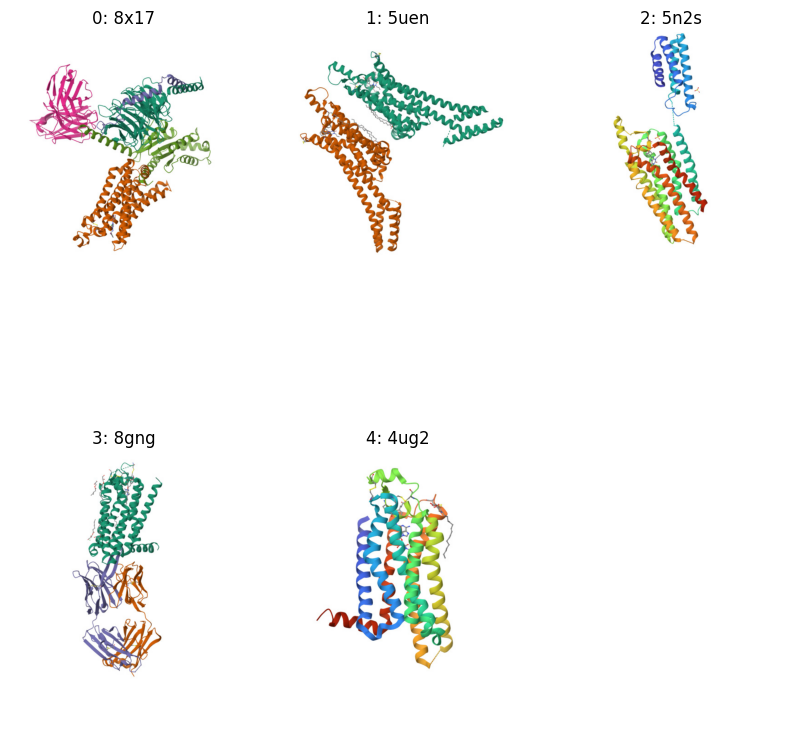

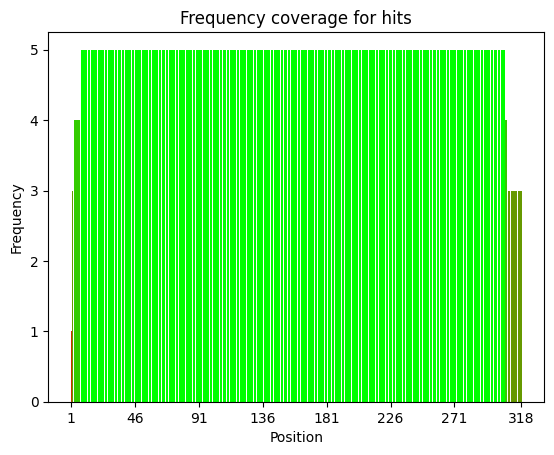

4.89622641509434


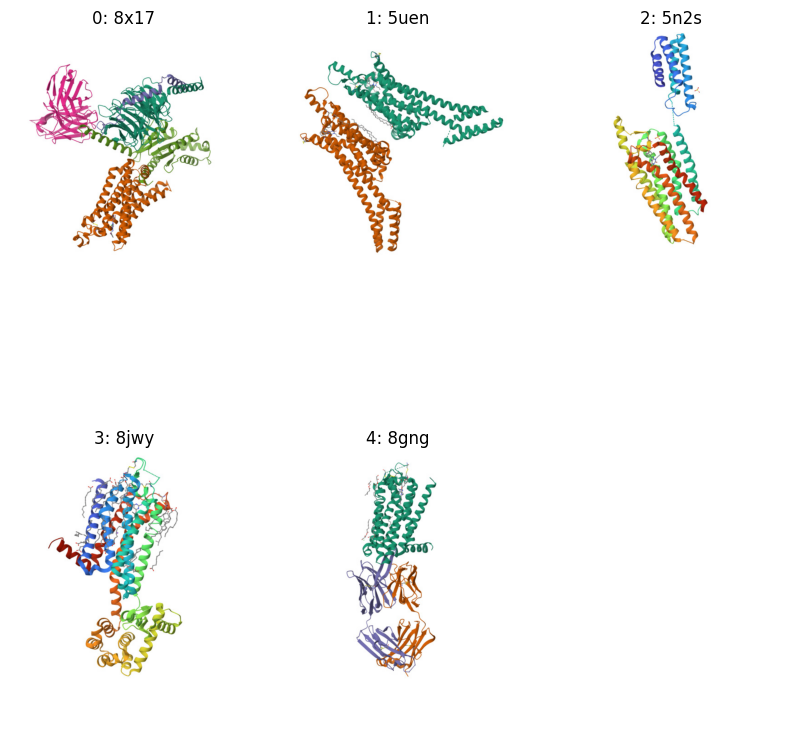

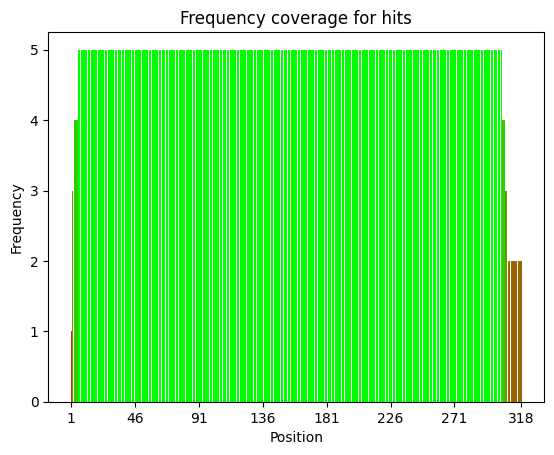

4.8584905660377355


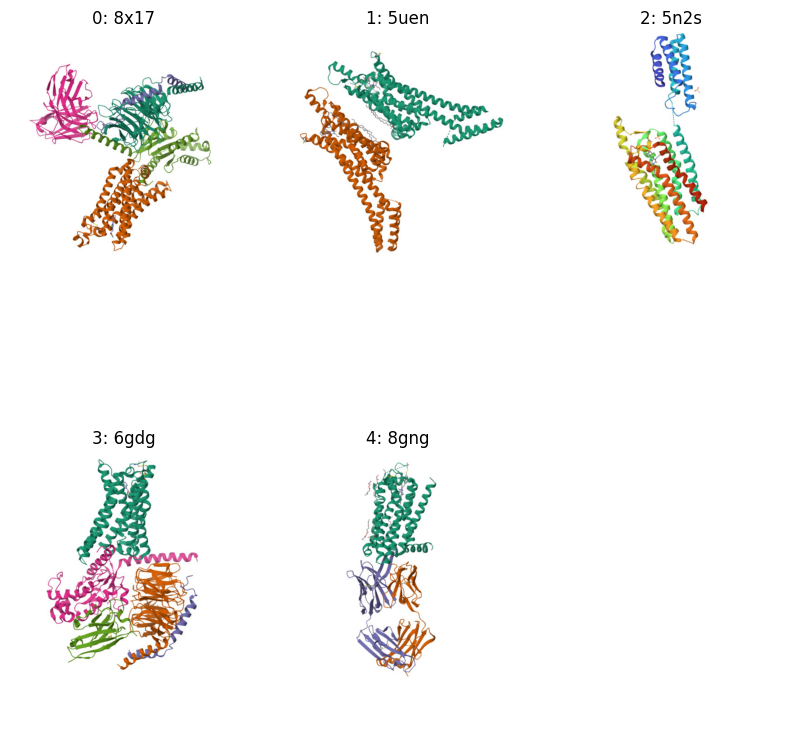

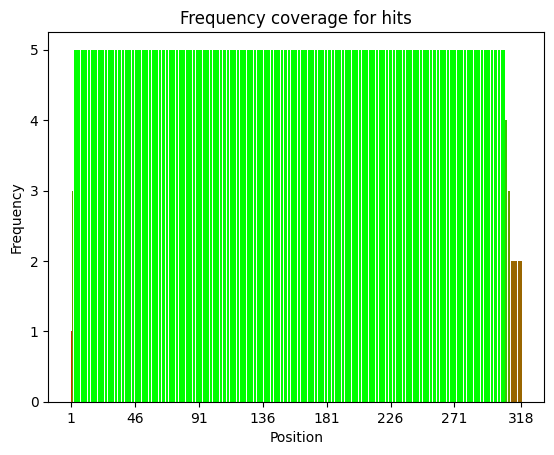

4.886792452830188


In [5]:
# ['No', 'Hit', 'Name', 'Probability', 'E-value', 'P-value', 'Score', 'SS', 'Cols', 'Query HMM', 'Template', 'HMM', 'Query Coverage', 'Similarity', 'Identities', 'Organism']

combos = generate_combinations(hits, 3, 5)

score_params = ['SS', 'Identities', 'E-value']
scalings = [1, 1, -100]

#combos params score
average_by_hits = False
average_by_num_params = True
combos_score = [score_by_params(archive, x, score_params, scalings, average_by_hits, average_by_num_params) for x in combos]


# weighting by coverage with average by hits False (avoid penalizing more templates)
avg_log_weighted_freqs_score = [avg_log_weighted_freq_score(archive, x) for x in combos]
print(avg_log_weighted_freqs_score)

combos_score_weighted = [combos_score[i] * avg_log_weighted_freqs_score[i] for i in range(len(combos_score))]

combos_sorted2_idxs = sorted(range(len(combos_score_weighted)), key=lambda x: combos_score_weighted[x], reverse=True)
combos_sorted2 = [combos[i] for i in combos_sorted2_idxs]
combos_score = [combos_score[i] for i in combos_sorted2_idxs]

print(combos_score)
for combo in combos_sorted2[:3]:
    see_all_hits_3d(combo, image_dir_path)
    frequencies_combos_sorted2 = archive.get_frequency_coverage_for_hits(combo)
    avg_freqs = archive.get_average_frequency(frequencies_combos_sorted2)
    archive.plot_frequency_coverage(frequencies_combos_sorted2)
    print(avg_freqs)

In [6]:
url_template = 'https://www.rcsb.org/structure/'
link_lists = []

with open('links.txt', 'w') as f:
    for combo in combos_sorted2[:6]:
        temp = []
        for hit in combo:
            temp.append(url_template + hit.upper())
        link_lists.append(temp)
        
    for lis in link_lists:
        for li in lis:
            f.write(li + '\n')
        f.write('\n')

In [ ]:
with open('unique_protein_states.csv', 'r') as f:
    lines = f.readlines()

lines = [l.strip().lower() for l in lines]
hit_to_state = dict()

for line in lines[1:]:
    h,s = line.split(',')
    hit_to_state[h] = s

all_active_groups = []

for c in combos_sorted2[:6]:
    state = hit_to_state[c[0]]
    if all([hit_to_state[h] == 'state' for h in c]):
        all_active_groups.append(c)
        
print(all_active_groups)


[]


[0.9816664308221459, 0.9784035574001424, 0.9825861831817704, 0.9784035574001424, 0.9857615762771386, 0.9899442020587664, 0.9857615762771386, 0.9866813286367628, 0.9811628144790162, 0.9866813286367628, 0.9852272209266908, 0.9900624213927194, 0.9852272209266908, 0.986799547970716, 0.9806284591285684, 0.986799547970716, 0.9920201454459211, 0.9858490566037735, 0.9920201454459211, 0.9874213836477987, 1.142981447133786, 1.146432080742525, 1.142981447133786, 1.1439011994934105, 1.1397185737117825, 1.1439011994934105, 1.1491217969686156, 1.1449391711869876, 1.1491217969686156, 1.1458589235466121, 1.1486544225642572, 1.1438192220982288, 1.1486544225642572, 1.1453915491422537, 1.1494409591408363, 1.2773366400476958, 1.273886006438957, 1.2773366400476958, 1.2748057587985813, 1.2788551687971639, 1.278017393832721]
[222.625, 222.55, 222.0, 222.05, 221.075, 185.325, 186.05, 185.5, 185.425, 184.575, 185.55, 184.5, 185.475, 183.95, 184.925, 184.0, 148.825, 148.75, 148.2, 148.25, 147.275, 148.925, 148.

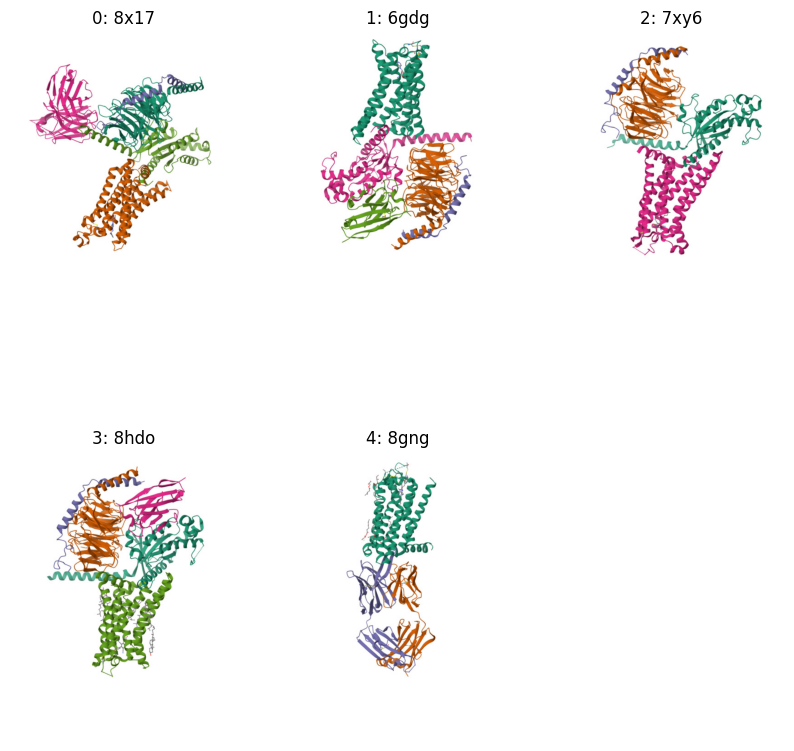

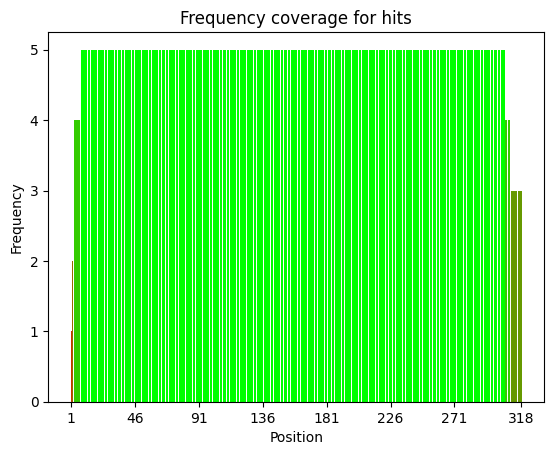

4.89937106918239


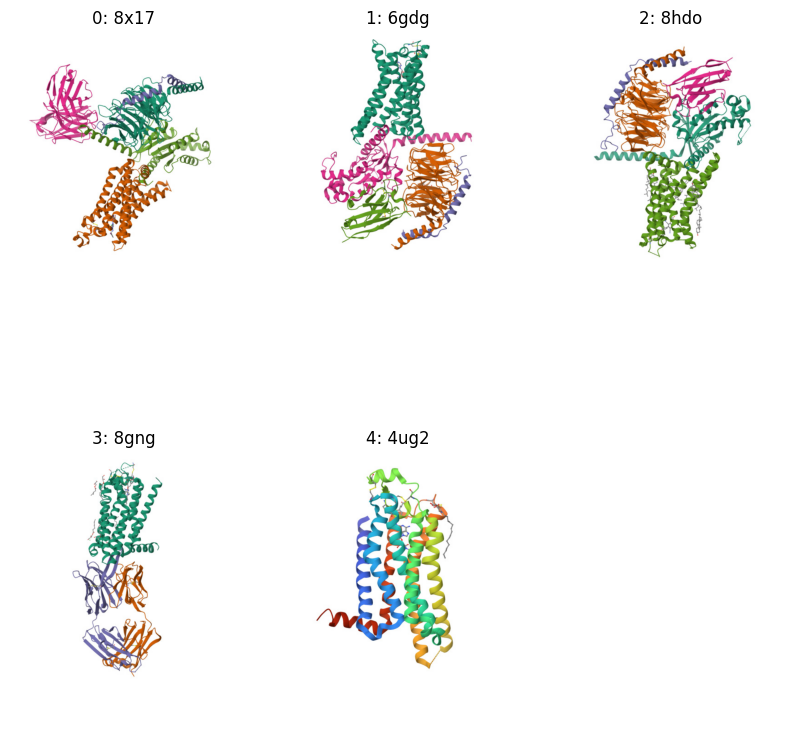

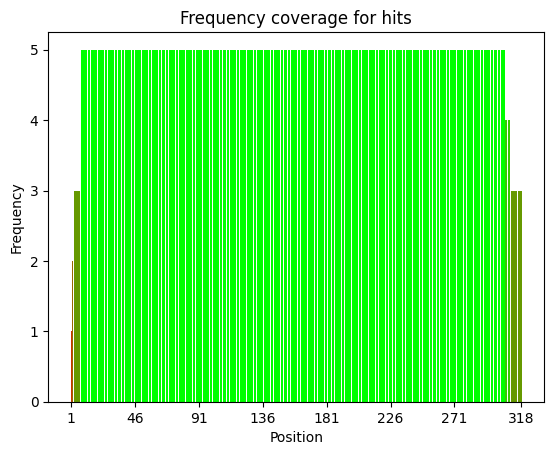

4.883647798742138


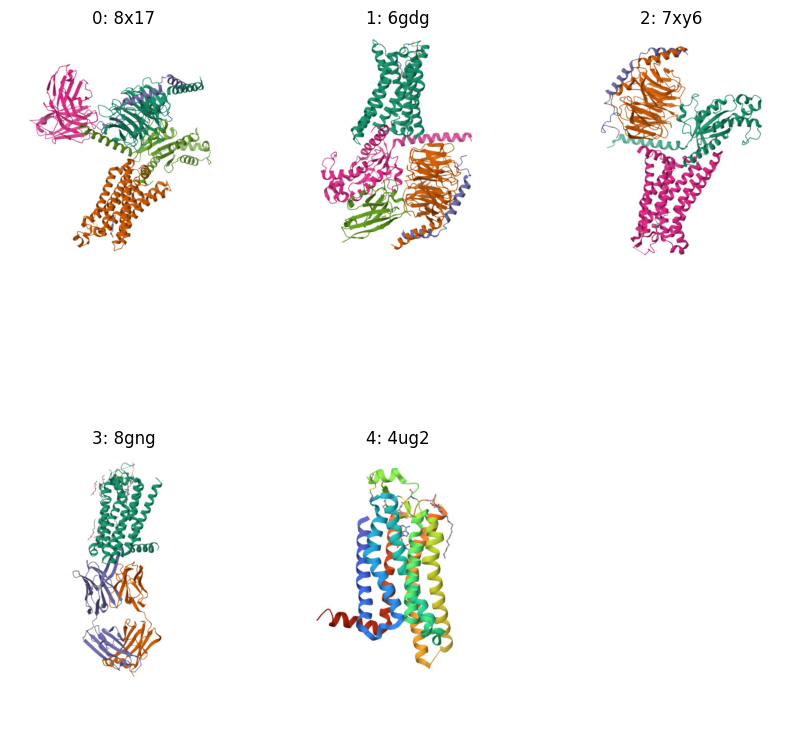

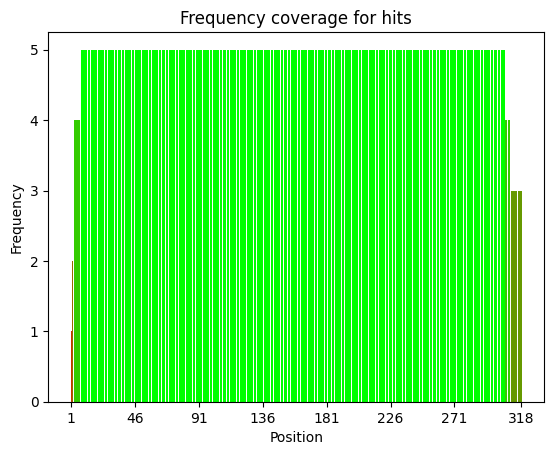

4.89937106918239


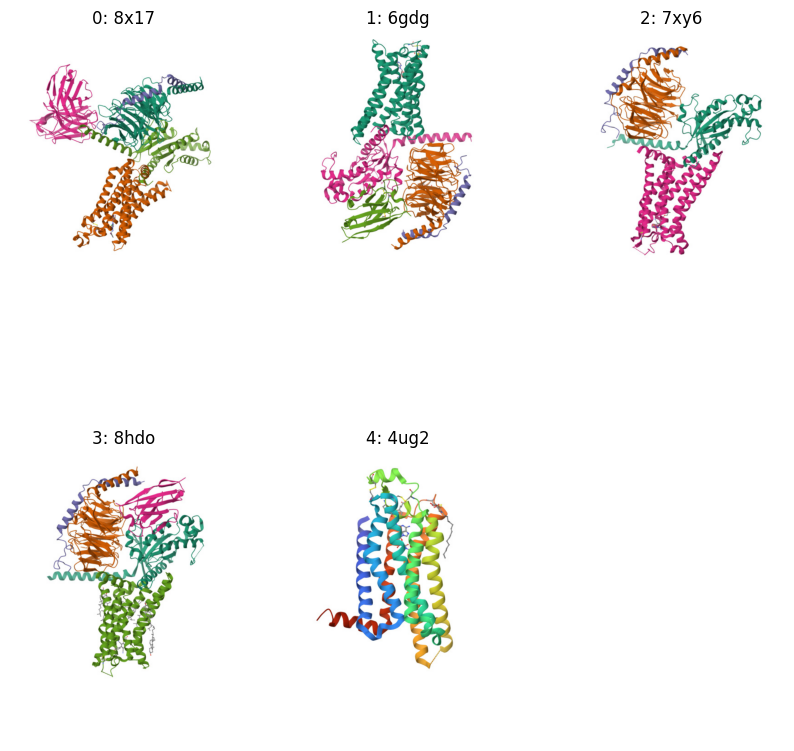

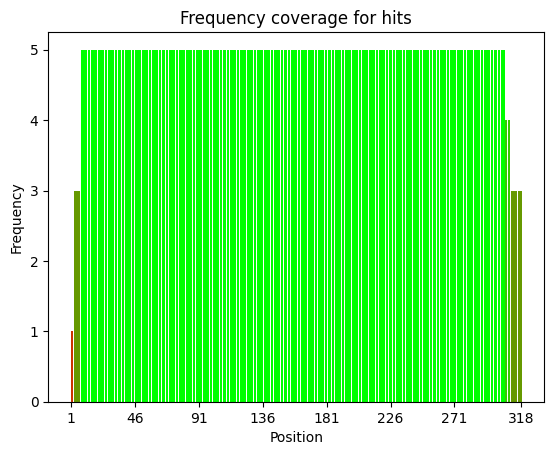

4.880503144654088


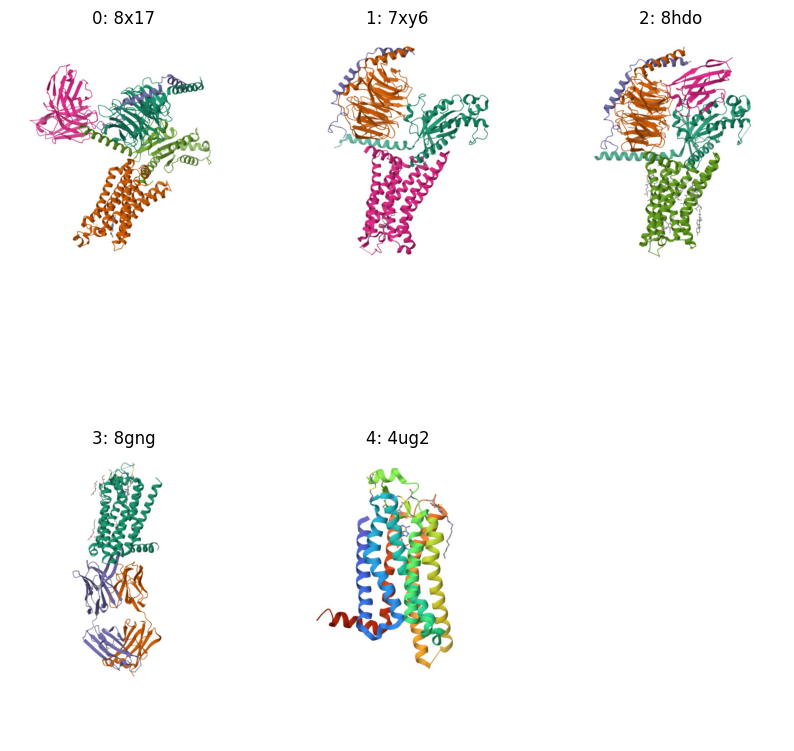

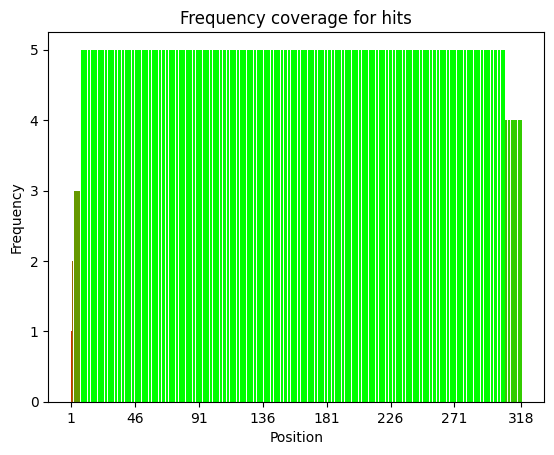

4.908805031446541


In [12]:
actives = [k for k,v in hit_to_state.items() if v == 'active']
combos_actives = generate_combinations(actives, 3, min(5, len(actives)))

score_params_actives = ['SS', 'Identities', 'E-value', 'Similarity']
scalings_actives = [1, 1, -100, 100]

#combos params score
average_by_hits = False
average_by_num_params = True
combos_score_actives = [score_by_params(archive, x, score_params_actives, scalings_actives, average_by_hits, average_by_num_params) for x in combos_actives]


# weighting by coverage with average by hits False (avoid penalizing more templates)
avg_log_weighted_freqs_score_actives = [avg_log_weighted_freq_score(archive, x) for x in combos_actives]
print(avg_log_weighted_freqs_score_actives)

combos_score_weighted_actives = [combos_score_actives[i] * avg_log_weighted_freqs_score_actives[i] for i in range(len(combos_score_actives))]

combos_sorted2_idxs_actives = sorted(range(len(combos_score_weighted_actives)), key=lambda x: combos_score_weighted_actives[x], reverse=True)
combos_sorted2_actives = [combos_actives[i] for i in combos_sorted2_idxs_actives]
combos_score_actives = [combos_score_actives[i] for i in combos_sorted2_idxs_actives]

print(combos_score_actives)
for combo in combos_sorted2_actives[:5]:
    see_all_hits_3d(combo, image_dir_path)
    frequencies_combos_sorted2_actives = archive.get_frequency_coverage_for_hits(combo)
    avg_freqs_actives = archive.get_average_frequency(frequencies_combos_sorted2_actives)
    archive.plot_frequency_coverage(frequencies_combos_sorted2_actives)
    print(avg_freqs_actives)

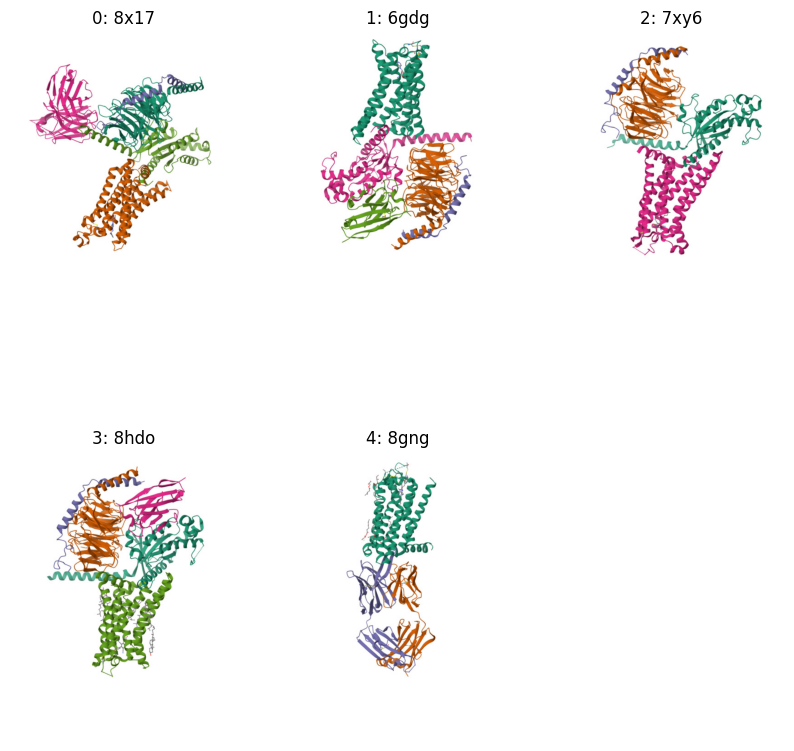

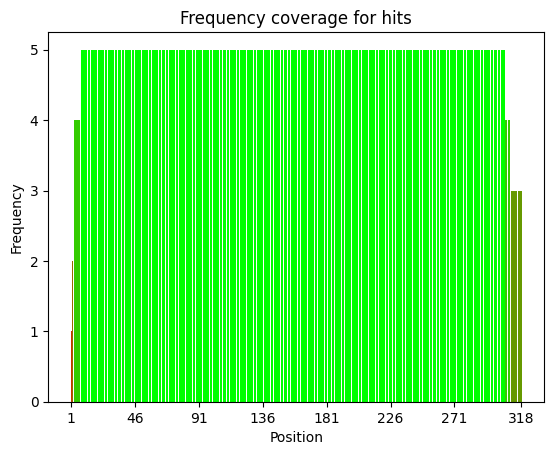

4.89937106918239


In [13]:
'''
8HDO,Active
7XY6,Active
4UG2,Active
7T32,Active
'''

active_hits = combos_sorted2_actives[0]

see_all_hits_3d(active_hits, image_dir_path)
frequencies_combos_active_hits = archive.get_frequency_coverage_for_hits(active_hits)
avg_freqs_active_hits = archive.get_average_frequency(frequencies_combos_active_hits)
archive.plot_frequency_coverage(frequencies_combos_active_hits)
print(avg_freqs_active_hits)

['8x17', '6gdg', '7xy6', '8gng']


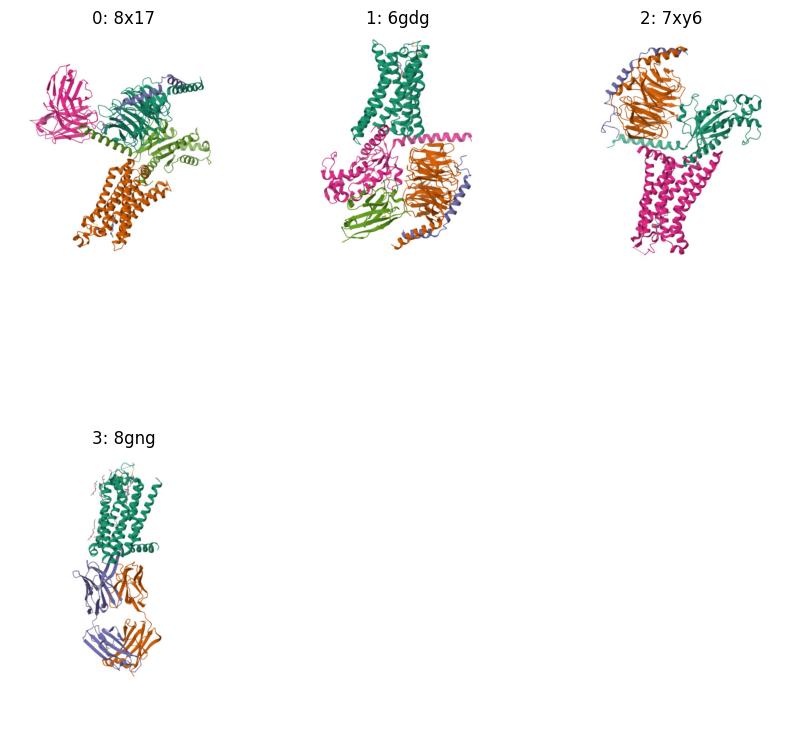

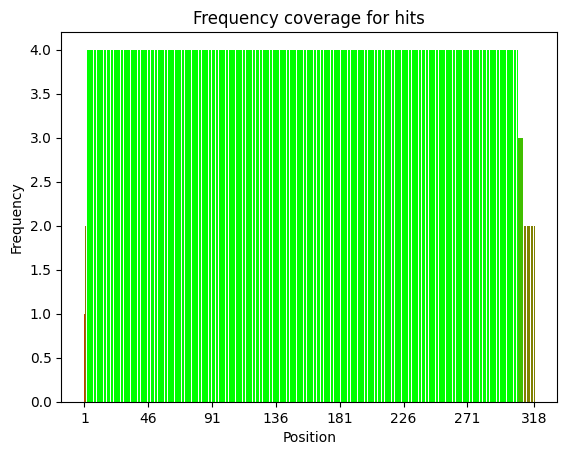

3.9213836477987423


In [16]:
print(combos_sorted2_actives[0])
# 8hdo is chimeric

selection = [x for x in combos_sorted2_actives[0] if x != '8hdo']
see_all_hits_3d(selection, image_dir_path)
frequencies_combos_selection = archive.get_frequency_coverage_for_hits(selection)
avg_freqs_selection = archive.get_average_frequency(frequencies_combos_selection)
archive.plot_frequency_coverage(frequencies_combos_selection)
print(avg_freqs_selection)

In [21]:
with open('names.txt', 'w') as f:
    f.write('id,name\n')
    for t in archive.templates:
        n = t.get_attribute('Name')
        id = t.get_attribute('Hit')
        f.write(f'{id},{n}\n')
    